In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd

%matplotlib inline

In [2]:
data = pd.read_csv('../dataset/geo.csv', index_col=0)
data

,lat,lon,country,city,match_score,location_string
id,,,,,,
48,52.478910,-1.905920,GBR,Birmingham,100.0,birmingham
49,51.453790,-2.591680,GBR,Bristol,73.0,est. september 2012 - bristol
50,7.188100,21.093750,NaN,NaN,100.0,africa
52,39.952220,-75.162180,USA,Philadelphia,100.0,"philadelphia, pa"
53,51.506420,-0.127210,GBR,London,100.0,"london, uk"
...,...,...,...,...,...,...
8685,42.910975,-78.865828,USA,Buffalo,100.0,"ìït: 42.910975,-78.865828"
9081,27.913602,-81.607853,USA,Lake Wales,100.0,"ìït: 27.9136024,-81.6078532"
9161,19.600858,-99.047821,MEX,Ecatepec de Morelos,100.0,"19.600858, -99.047821"


Descartamos los de score menor a 90

In [14]:
data = data[data['match_score'] >= 90]
data

,lat,lon,country,city,match_score,location_string
id,,,,,,
48,52.478910,-1.905920,GBR,Birmingham,100.0,birmingham
50,7.188100,21.093750,NaN,NaN,100.0,africa
52,39.952220,-75.162180,USA,Philadelphia,100.0,"philadelphia, pa"
53,51.506420,-0.127210,GBR,London,100.0,"london, uk"
54,-25.745870,28.187640,ZAF,Tshwane,100.0,pretoria
...,...,...,...,...,...,...
8685,42.910975,-78.865828,USA,Buffalo,100.0,"ìït: 42.910975,-78.865828"
9081,27.913602,-81.607853,USA,Lake Wales,100.0,"ìït: 27.9136024,-81.6078532"
9161,19.600858,-99.047821,MEX,Ecatepec de Morelos,100.0,"19.600858, -99.047821"


In [185]:
import math
countries = data['country'].value_counts()
countries = countries.to_frame().reset_index()
countries = countries.rename(columns={'index': 'country', 'country': 'tweets'})
countries

,country,tweets,log
0,USA,2125,7.661527
1,GBR,395,5.978886
2,CAN,206,5.327876
3,IND,148,4.997212
4,AUS,110,4.700480
...,...,...,...
116,LCA,1,0.000000
117,BHS,1,0.000000
118,AUT,1,0.000000
119,GTM,1,0.000000


In [69]:
main_countries = countries[:7]
main_countries.at['OTHERS'] = countries[7:].sum()
main_countries

USA       2125
GBR        395
CAN        206
IND        148
AUS        110
NGA         78
ZAF         48
OTHERS     732
Name: country, dtype: int64

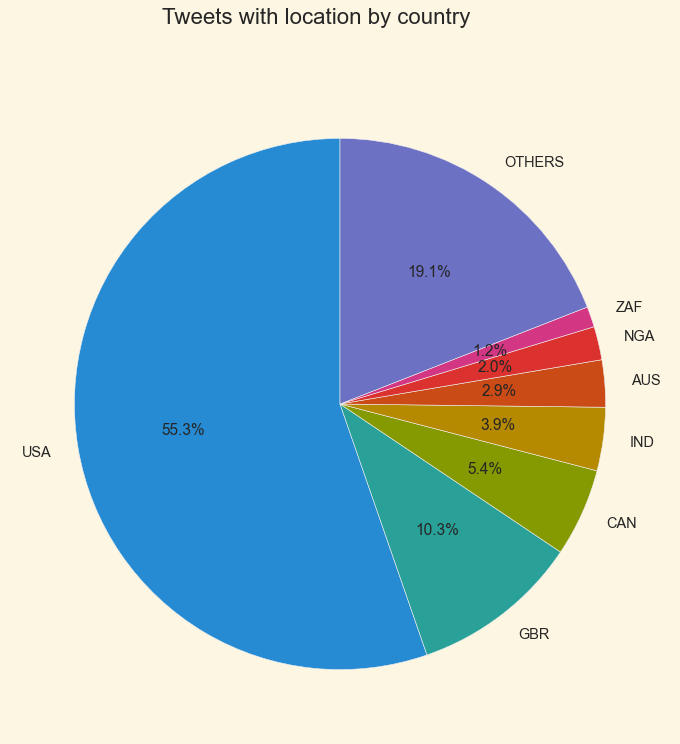

In [83]:
plt.style.use('Solarize_Light2')
fig1, ax1 = plt.subplots(figsize=(20, 10))
fig1.suptitle('Tweets with location by country', fontsize=20)
ax1.pie(main_countries, labels=main_countries.index, autopct='%1.1f%%',
        startangle=90)
plt.show()

In [71]:
cities = data['city'].value_counts()
cities

New York       144
London          96
Los Angeles     57
Washington      52
Chicago         41
              ... 
Wahpeton         1
Westchester      1
Frome            1
Maricopa         1
Perenjori        1
Name: city, Length: 1090, dtype: int64

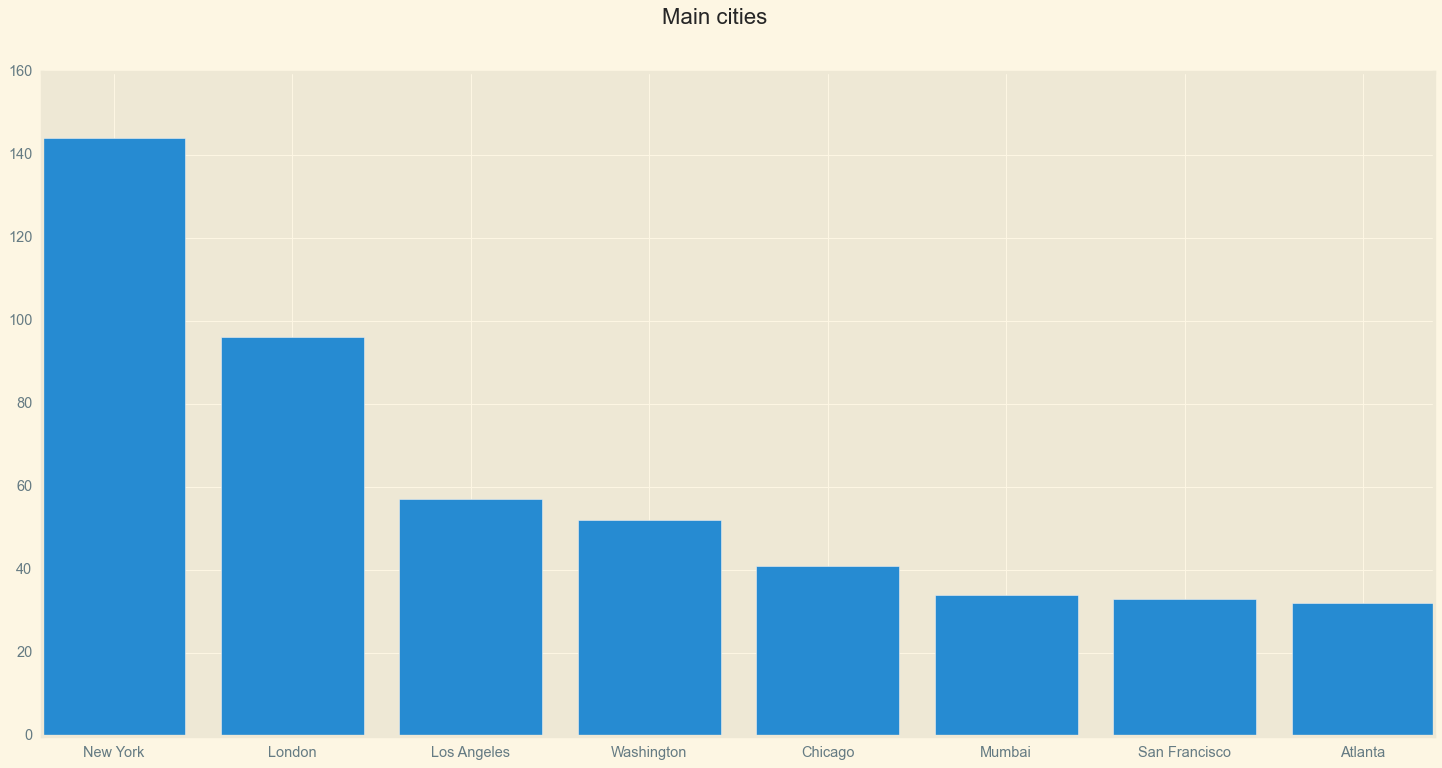

In [84]:
main_cities = cities.head(8)

plt.style.use('Solarize_Light2')
fig1, ax1 = plt.subplots(figsize=(20, 10))
fig1.suptitle('Main cities', fontsize=20)
ax1.bar(main_cities.index, main_cities)
plt.show()

In [204]:
shapefile = '../map/ne_50m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[239])
merged = gdf.merge(countries, left_on='country_code', right_on='country' , how='left')
merged.fillna(0, inplace = True)

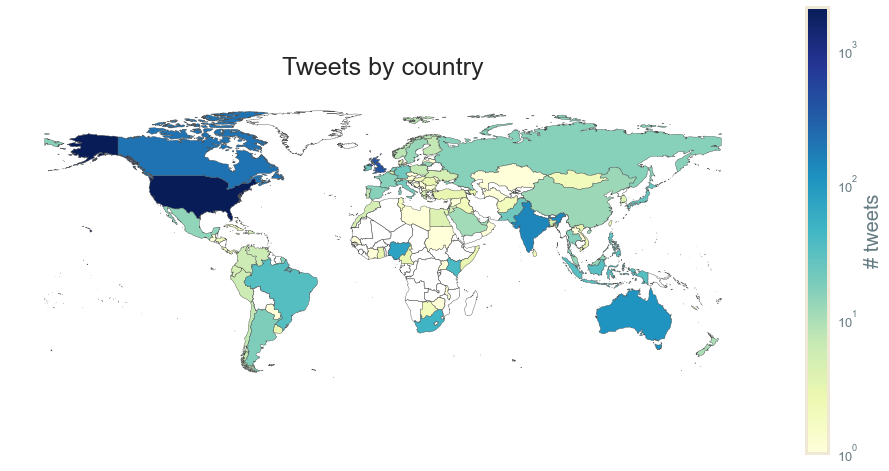

In [206]:
vmin, vmax = countries['tweets'].min(), countries['tweets'].max()
norm = colors.LogNorm(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(1, figsize=(15, 8))
merged.plot(column='tweets', cmap='YlGnBu', linewidth= 0.4 , ax=ax, edgecolor='0.3', norm=norm)
#Le saco los ejes
ax.axis('off')

#Titulo
ax.set_title('Tweets by country', fontdict={'fontsize': '25', 'fontweight' : '3'})

#Barra indicadora
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=norm)
cbar = fig.colorbar(sm)
cbar.set_label('# tweets',size = 20)